<a href="https://colab.research.google.com/github/Srinishaa/GRIP-tasks/blob/main/Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Retail**

---






In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file='SampleSuperstore.csv'
data=pd.read_csv(file)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Visualisation

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
pd.isnull(data).values.any()

False

## Visualising data - Histograms, Distributions and Bar charts

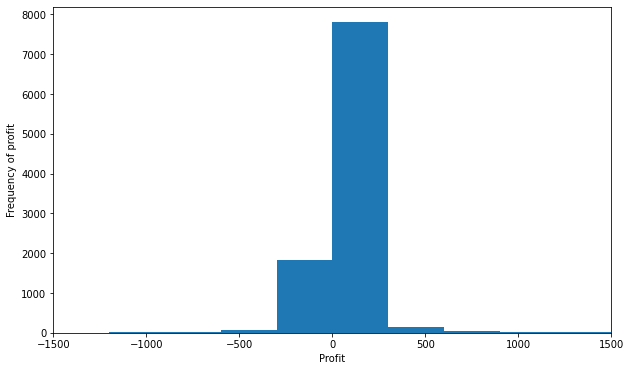

In [37]:
# Histogram of Profit
plt.figure(figsize=(10,6))
plt.xlim(-1500,1500)
plt.hist(data['Profit'],bins=50)
plt.xlabel('Profit')
plt.ylabel('Frequency of profit')
plt.show()

From the plot above we can observe that the profit is highest between range of 0-250

# Univariate Analysis

In [ ]:
# Analysing the different Category items sold in supermarket
print(data['Category'].value_counts(),'\n')
print('% of each category sold \n')
print((data['Category'].value_counts()/data['Category'].size)*100)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64 

% of each category sold 

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64


In [ ]:
# Analysing the different Sub-Category items sold in supermarket
print(data['Sub-Category'].value_counts(),'\n')
print('% of each Sub-category sold \n')
print((data['Sub-Category'].value_counts()/data['Sub-Category'].size)*100)

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64 

% of each Sub-category sold 

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64


[]

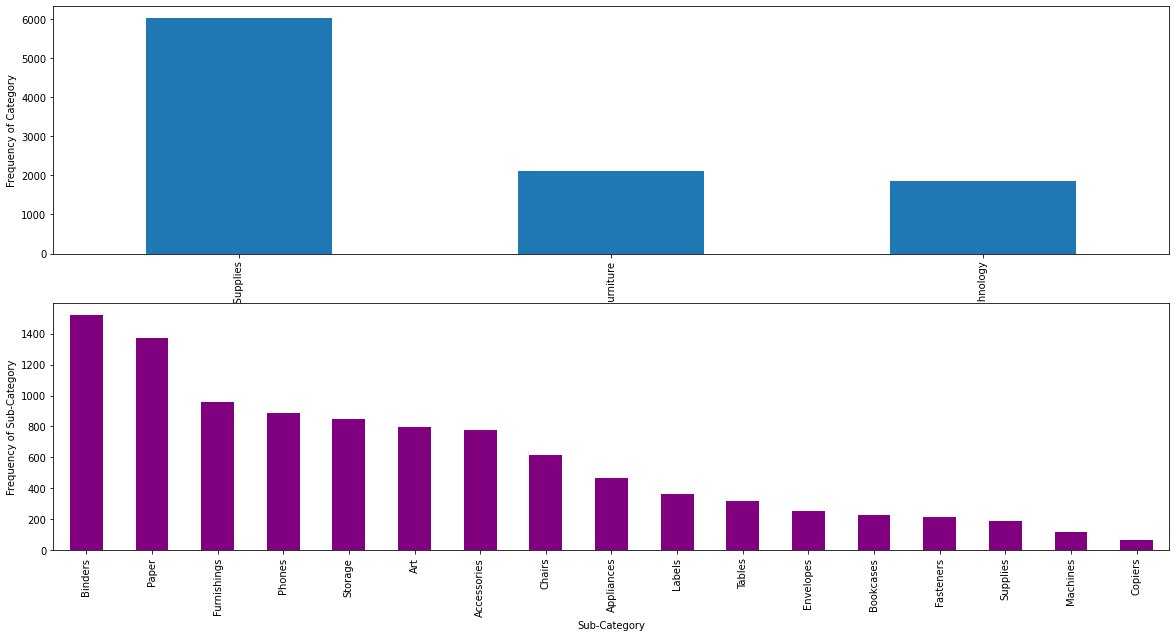

In [ ]:
# Bar plot of Category and Sub-Category
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency of Category')

plt.subplot(2,1,2)
data['Sub-Category'].value_counts().plot(kind='bar',color='purple')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency of Sub-Category')
plt.plot()

In [ ]:
# Analysing the different Segments
print(data['Segment'].value_counts(),'\n')
print('% of Segments')
print((data['Segment'].value_counts()/data['Segment'].size)*100)

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64 

% of Segments
Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64


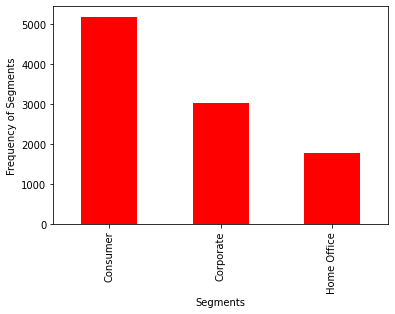

In [40]:
# Bar plot of Segments
data['Segment'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Segments')
plt.ylabel('Frequency of Segments')
plt.show()

In [ ]:
# Analysing the Ship Modes
print(data['Ship Mode'].value_counts(),'\n')
print('% of each the Ship Mode \n')
print((data['Ship Mode'].value_counts()/data['Ship Mode'].size)*100)

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 

% of each the Ship Mode 

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64


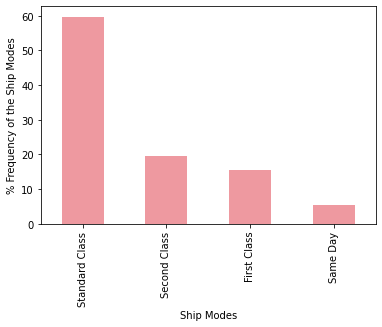

In [ ]:
# Bar graph of the Ship Modes
segments=((data['Ship Mode'].value_counts()/data['Ship Mode'].size)*100)
segments.plot(kind='bar',color='#ee99a0')
plt.xlabel('Ship Modes')
plt.ylabel('% Frequency of the Ship Modes')
plt.show()

# Bivariate Analysis- involving or depending on two variates

In [ ]:
data.pivot_table(index='Segment',columns='Discount',values='Profit',aggfunc='mean')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,64.161707,93.630090,15.744638,22.426571,-48.018291,-102.708631,-93.462041,-216.651900,-253.572181,-38.639822,-106.962433,-115.213404
Corporate,71.584290,99.802956,49.282143,23.157672,-46.241380,-82.702010,-132.003562,-280.968633,-388.164788,-40.623326,-68.023771,-96.815833
Home Office,66.961384,97.234865,30.271889,34.734830,-37.189678,-57.226350,-119.900858,-175.146900,-377.121333,-60.039948,-115.479956,-62.509202


The above table shows that with discounts more than 0.20 ie. 20% all the segments show a negative profit rate.

In [ ]:
data.pivot_table(index='Segment',columns='Category',values='Profit',aggfunc='mean')

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,6.281293,18.014174,74.445646
Corporate,11.741201,22.102923,79.723823
Home Office,10.705465,24.034439,89.152458


The above table shows that technology gives the most profit in all segments.

In [ ]:
data.pivot_table(index='Segment',columns='Sub-Category',values='Profit',aggfunc='mean')

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Segment,,,,,,,,,,,,,,,,,
Consumer,50.823339,28.614460,8.070797,23.071278,-33.859834,40.228972,688.106017,25.305524,5.059656,16.031220,16.275071,37.562488,22.416513,52.853913,15.787112,-16.575513,-61.182628
Corporate,55.980090,47.934808,9.195632,13.482706,9.975784,44.386471,949.513945,30.609869,4.269542,12.181277,17.263013,20.086257,25.395948,43.258160,35.119326,5.556170,-46.287723
Home Office,60.665948,55.614657,7.125588,21.662393,9.837333,50.101779,964.910415,27.525246,2.745782,9.322933,9.718333,23.507657,30.324829,53.689134,37.085304,4.466393,-57.239717


The above table shows profit of each segment in each category.

In [ ]:
data.pivot_table(index='Segment',columns='City',values='Profit',aggfunc='mean')

City,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,...,Tuscaloosa,Twin Falls,Tyler,Urbandale,Utica,Vacaville,Vallejo,Vancouver,Vineland,Virginia Beach,Visalia,Waco,Warner Robins,Warwick,Washington,Waterbury,Waterloo,Watertown,Waukesha,Wausau,Waynesboro,West Allis,West Jordan,West Palm Beach,Westfield,Westland,Westminster,Wheeling,Whittier,Wichita,Wilmington,Wilson,Woodbury,Woodland,Woodstock,Woonsocket,Yonkers,York,Yucaipa,Yuma
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Consumer,6.63,-3.7584,-11.6102,9.628450,10.528933,-9.969375,1.85640,NaN,-44.795538,25.212375,31.04715,NaN,NaN,11.566133,5.339867,544.4175,153.018607,1.2348,NaN,23.2896,77.92778,154.739410,NaN,33.250653,-11.969807,2.174200,12.694833,14.840691,33.500822,NaN,10.008,NaN,NaN,14.5397,NaN,37.07256,6.97965,123.8779,-330.1810,NaN,...,NaN,NaN,-88.74172,19.239333,24.855257,110.0528,14.557675,NaN,5.278120,56.311988,28.187667,-103.83164,10.4650,NaN,144.470929,11.028875,11.8248,60.901375,14.17,22.60765,70.982086,NaN,20.53446,14.7386,NaN,29.969192,44.922859,-92.567850,44.4768,51.14284,37.524608,7.7396,NaN,23.9984,30.3871,20.1248,205.625423,NaN,NaN,NaN
Corporate,NaN,NaN,-6.2231,62.489250,30.245483,NaN,NaN,-0.59175,-14.802000,75.509600,NaN,38.12895,9.3312,-11.889600,63.809250,NaN,-0.563158,NaN,14.9639,-5.2170,29.89440,250.387833,11.68,33.519700,-61.623729,-28.061555,NaN,7.170400,37.566322,84.44408,NaN,NaN,3.6288,0.9576,0.95205,19.65728,1.53120,362.8350,-6.2764,218.306467,...,NaN,133.08245,NaN,NaN,14.572800,NaN,NaN,16.00235,11.953733,374.668675,3.484800,-0.94520,43.2234,212.75912,NaN,53.225567,NaN,126.292140,NaN,NaN,NaN,14.1854,NaN,NaN,11.7039,NaN,NaN,NaN,NaN,NaN,71.688911,-8.1344,65.3654,4.6932,-12.0784,19.5181,NaN,-20.43384,13.208,24.94095
Home Office,NaN,NaN,0.8178,57.602883,15.079800,NaN,-46.03264,NaN,NaN,NaN,NaN,76.40000,NaN,21.722100,10.666200,10.3488,7.548086,NaN,NaN,NaN,NaN,347.207100,NaN,1.297600,-56.912200,40.075150,NaN,3.445433,56.712771,NaN,NaN,26.467667,NaN,NaN,6.81200,NaN,7.60500,NaN,NaN,NaN,...,25.5052,NaN,NaN,NaN,NaN,NaN,138.902400,11.44520,NaN,18.928275,NaN,NaN,NaN,NaN,16.097600,33.785825,NaN,31.941000,NaN,NaN,35.503733,NaN,NaN,2.1320,32.4420,NaN,NaN,87.625067,NaN,34.10620,133.970367,-5.4120,NaN,NaN,0.9100,NaN,47.312600,NaN,NaN,-257.93640


The above table shows profit of each segment in each city.

# Graphical Representation of Profit vs bivariate features

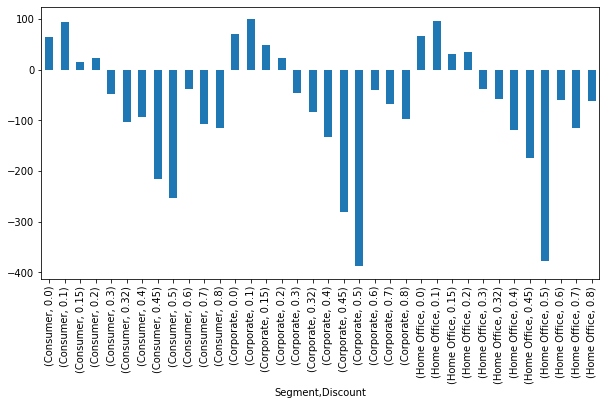

In [ ]:
plt.figure(figsize=(10,5))
profit_table=data.groupby(['Segment','Discount']).Profit.mean()
profit_table.plot(kind='bar')
plt.show()

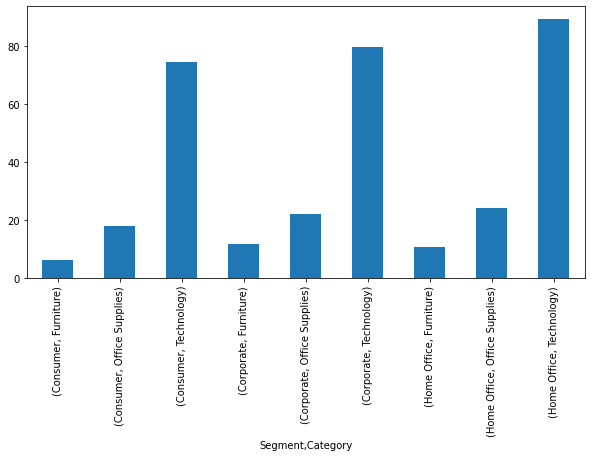

In [ ]:
plt.figure(figsize=(10,5))
profit_table=data.groupby(['Segment','Category']).Profit.mean()
profit_table.plot(kind='bar')
plt.show()

### The shopkeeper can analyse the above data analysis and take up steps to maximise his profit for eg, having discounts on items not exceeding 20%, investing more on technology items since that has the highest profit rate for all segment of consumers and so on.